In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

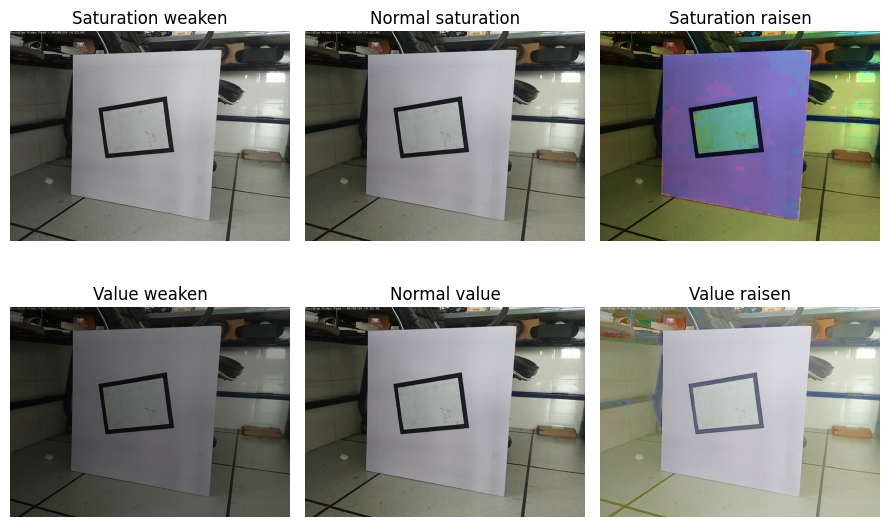

In [3]:
# 14.12 使用 LUT 调节饱和度和明度
img = cv.imread("img/i.png", flags=1)  # 读取彩色
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)  # 色彩空间转换, BGR->HSV

# 调节通道强度
lutWeaken = np.array([int(0.6*i) for i in range(256)]).astype("uint8")
lutEqual = np.array([i for i in range(256)]).astype("uint8")
lutRaisen = np.array([int(102+0.6*i) for i in range(256)]).astype("uint8")
# 调节饱和度
lutSWeaken = np.dstack((lutEqual, lutWeaken, lutEqual))  # Saturation weaken
lutSRaisen = np.dstack((lutEqual, lutRaisen, lutEqual))  # Saturation raisen
# 调节明度
lutVWeaken = np.dstack((lutEqual, lutEqual, lutWeaken))  # Value weaken
lutVRaisen = np.dstack((lutEqual, lutEqual, lutRaisen))  # Value raisen

blendSWeaken = cv.LUT(hsv, lutSWeaken)  # 饱和度降低
blendSRaisen = cv.LUT(hsv, lutSRaisen)  # 饱和度增大
blendVWeaken = cv.LUT(hsv, lutVWeaken)  # 明度降低
blendVRaisen = cv.LUT(hsv, lutVRaisen)  # 明度升高

plt.figure(figsize=(9, 6))
plt.subplot(231), plt.axis('off'), plt.title("Saturation weaken")
plt.imshow(cv.cvtColor(blendSWeaken, cv.COLOR_HSV2RGB))
plt.subplot(232), plt.axis('off'), plt.title("Normal saturation")
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.subplot(233), plt.axis('off'), plt.title("Saturation raisen")
plt.imshow(cv.cvtColor(blendSRaisen, cv.COLOR_HSV2RGB))
plt.subplot(234), plt.axis('off'), plt.title("Value weaken")
plt.imshow(cv.cvtColor(blendVWeaken, cv.COLOR_HSV2RGB))
plt.subplot(235), plt.axis('off'), plt.title("Normal value")
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.subplot(236), plt.axis('off'), plt.title("Value raisen")
plt.imshow(cv.cvtColor(blendVRaisen, cv.COLOR_HSV2RGB))
plt.tight_layout()
plt.show()


(768, 1024, 3) (256,) (1, 256, 3) (768, 1024, 3)


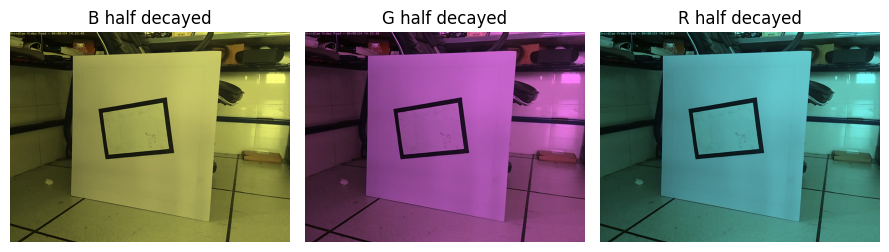

In [3]:
img = cv.imread("img/i.png", flags=1)  # 读取彩色

maxG = 128  # 修改颜色通道最大值，0<=maxG<=255
lutHalf = np.array([int(i * maxG/255) for i in range(256)]).astype("uint8")
lutEqual = np.array([i for i in range(256)]).astype("uint8")

lut3HalfB = np.dstack((lutHalf, lutEqual, lutEqual))  # (1,256,3), B_half/BGR
lut3HalfG = np.dstack((lutEqual, lutHalf, lutEqual))  # (1,256,3), G_half/BGR
lut3HalfR = np.dstack((lutEqual, lutEqual, lutHalf))  # (1,256,3), R_half/BGR

blendHalfB = cv.LUT(img, lut3HalfB)  # B 通道衰减 50%
blendHalfG = cv.LUT(img, lut3HalfG)  # G 通道衰减 50%
blendHalfR = cv.LUT(img, lut3HalfR)  # R 通道衰减 50%

print(img.shape, lutHalf.shape, lut3HalfB.shape, blendHalfB.shape)
plt.figure(figsize=(9, 5))
plt.subplot(131), plt.axis('off'), plt.title("B half decayed")
plt.imshow(cv.cvtColor(blendHalfB, cv.COLOR_BGR2RGB))
plt.subplot(132), plt.axis('off'), plt.title("G half decayed")
plt.imshow(cv.cvtColor(blendHalfG, cv.COLOR_BGR2RGB))
plt.subplot(133), plt.axis('off'), plt.title("R half decayed")
plt.imshow(cv.cvtColor(blendHalfR, cv.COLOR_BGR2RGB))
plt.tight_layout()
plt.show()